In [1]:
#import Library 
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import mixture


# part 3 

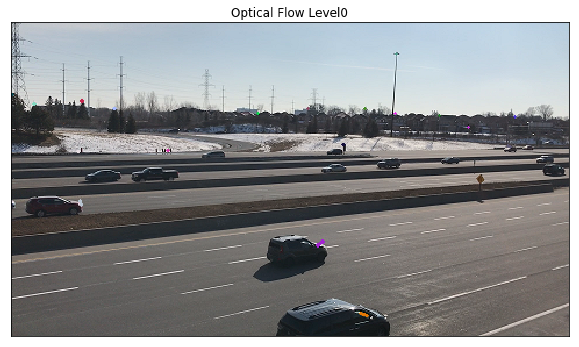

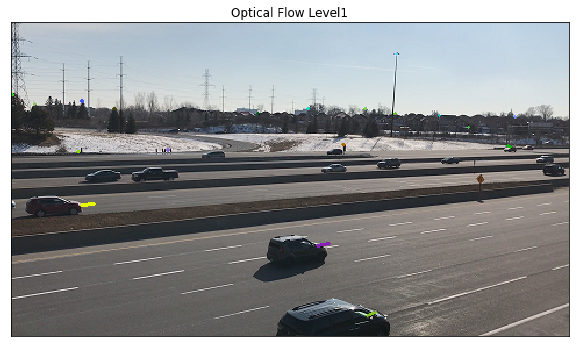

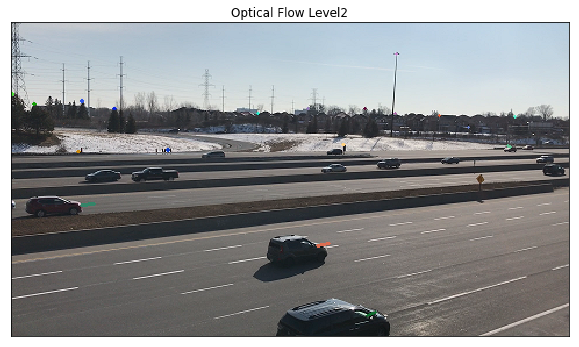

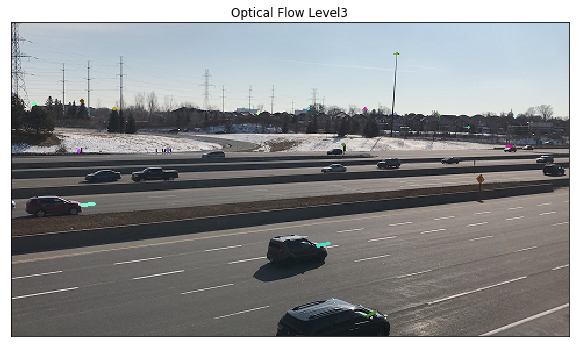

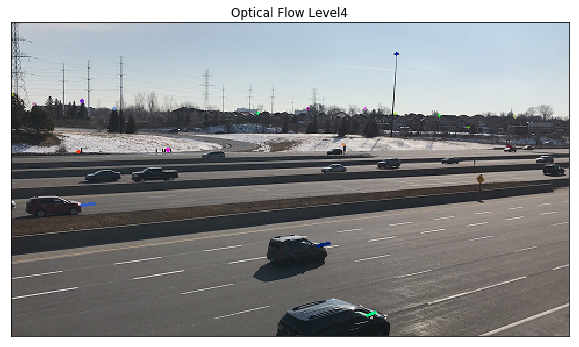

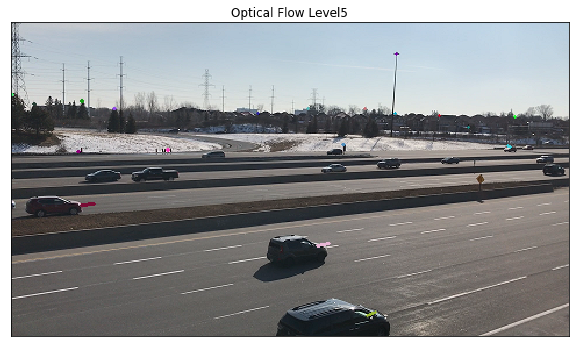

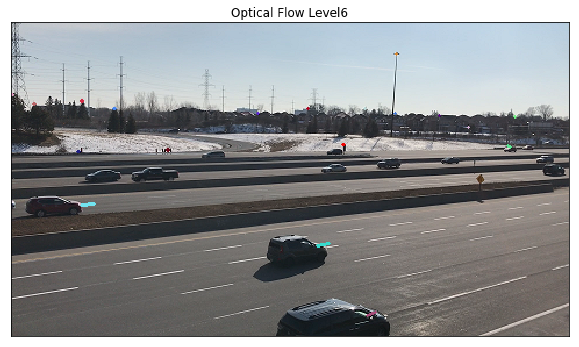

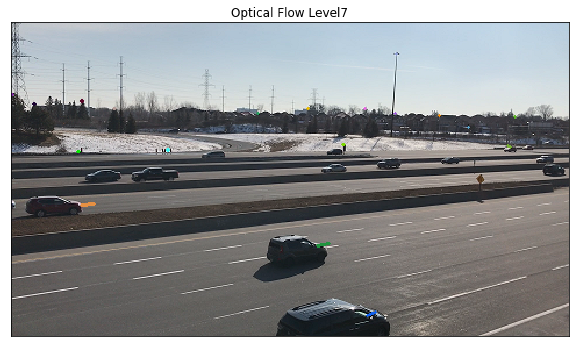

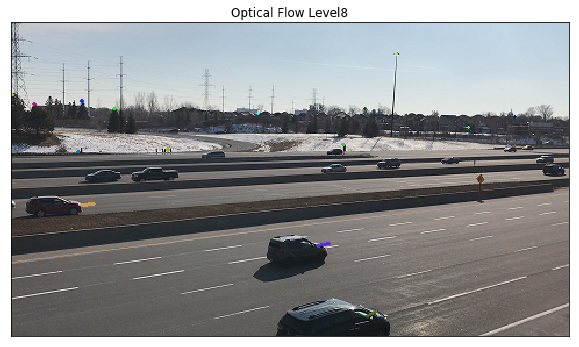

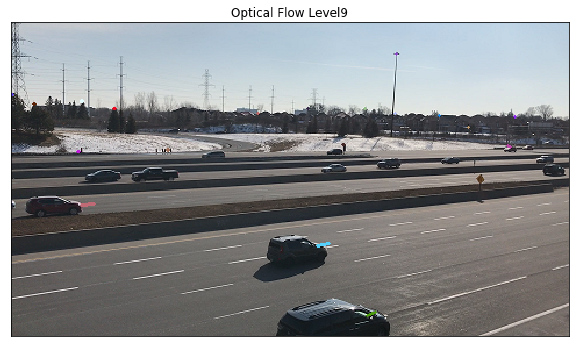

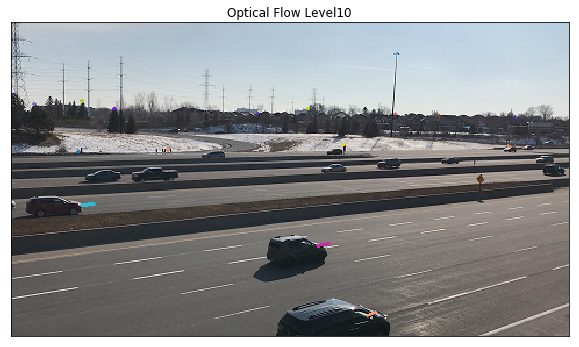

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# read images
img1 = cv2.imread("frame1.png")
img2 = cv2.imread("frame2.png")

# convert to grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

err_list=[]

for k in range(0,11): 
    # parameters for corner detection
    feature_params = dict( maxCorners = 500, # upper limit
                           qualityLevel = 0.2, # threshold for min eigenvalue accepted
                           minDistance =20 ,
                           blockSize = 3 )

    # parameters for lucas kanade optical flow
    lk_params = dict( winSize = (10,10),
                      maxLevel = k,
                      criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,
                                 10, 0.03)) 

    # find good corners in the first image
    p0 = cv2.goodFeaturesToTrack(img1_gray, **feature_params,useHarrisDetector=True)

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(img1_gray, img2_gray, p0, None, **lk_params)
    
    mean_err = np.mean(err[st==1])
    err_list.append(mean_err)

    # select good points
    good_new = p1[st==1]  # it might not bee good match but it what the program think is good
    good_old = p0[st==1]

    # create some random colors
    color = np.random.randint(0, 255, (good_new.shape[0], 3))

    # create a mask image for drawing purposes
    mask = img1.copy()
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (a,b), (c,d), color[i].tolist(), 2)

    
    plt.figure(figsize=(10,10))
    plt.imshow(mask)
    plt.title("Optical Flow Level" + str(k)), plt.xticks([]), plt.yticks([])
    plt.show()

 


[7.4584374, 4.4267764, 4.2583885, 4.581003, 4.612599, 4.612599, 4.612599, 4.612599, 4.612599, 4.612599, 4.612599]


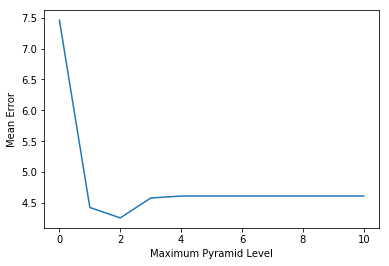

In [3]:
#Plot the mean of the error (on y-axis) vs. pyramid level (on x-axis). 
print(err_list)
x_list = [0,1,2,3,4,5,6,7,8,9,10] 
plt.plot(x_list,err_list)
plt.xlabel('Maximum Pyramid Level')
plt.ylabel('Mean Error')
plt.show()